<a href="https://colab.research.google.com/github/zhengwu123/Machine_learning_group_project/blob/master/final_project_fake_real_data_aug_0_77.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import glob
import cv2
from PIL import Image
from numpy import asarray
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import array_to_img
import numpy as np


In [0]:
!rm -rf real_main
!rm -rf real_nei
!rm -rf real_side
!rm -rf real_tongue
!rm -rf real_console
!rm -rf real_lid
!rm -rf unsorted/


In [1]:
#!ls "/content/drive/My Drive"

!unzip "/content/drive/My Drive/sorted.zip" -d "/content"

Archive:  /content/drive/My Drive/sorted.zip
   creating: /content/real_tongue/
  inflating: /content/real_tongue/RackMultipart20200503-26620-1akr951.jpg  
   creating: /content/__MACOSX/
   creating: /content/__MACOSX/real_tongue/
  inflating: /content/__MACOSX/real_tongue/._RackMultipart20200503-26620-1akr951.jpg  
  inflating: /content/real_tongue/RackMultipart20200416-10895-9smho0.jpg  
  inflating: /content/__MACOSX/real_tongue/._RackMultipart20200416-10895-9smho0.jpg  
  inflating: /content/real_tongue/RackMultipart20200503-13017-1bdk7p6.jpg  
  inflating: /content/__MACOSX/real_tongue/._RackMultipart20200503-13017-1bdk7p6.jpg  
  inflating: /content/real_tongue/RackMultipart20200503-18464-cpyarc.jpg  
  inflating: /content/__MACOSX/real_tongue/._RackMultipart20200503-18464-cpyarc.jpg  
  inflating: /content/real_tongue/RackMultipart20200416-3289-1b3bwib.jpg  
  inflating: /content/__MACOSX/real_tongue/._RackMultipart20200416-3289-1b3bwib.jpg  
  inflating: /content/real_tongue/I

In [0]:
#rename all my files
import glob, os

def rename(dir, pattern, titlePattern):
    for pathAndFilename in glob.iglob(os.path.join(dir, pattern)):
        title, ext = os.path.splitext(os.path.basename(pathAndFilename))
        os.rename(pathAndFilename, 
                  os.path.join(dir, titlePattern % title + ext))
#rename all files
rename('real_di', '*.JPG', '%s'+ " real")
rename('real_di', '*.jpg', '%s'+ " real")


rename('fake_di', '*.JPG', '%s'+ " fake")
rename('fake_di', '*.jpg', '%s'+ " fake")


In [0]:
# prepare data
import random
train_real = ['real_di/{}'.format(i) for i in os.listdir("real_di/") if 'real' in i]

#fake
train_fake = ['fake_di/{}'.format(i) for i in os.listdir("fake_di/") if 'fake' in i]

train_images = train_fake + train_real
random.shuffle(train_images)

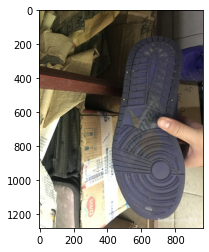

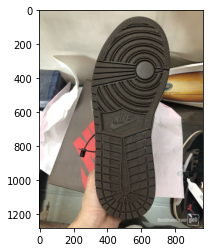

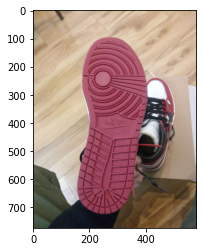

In [145]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
for ima in train_images[0:3]:
  img=mpimg.imread(ima)
  imgplot = plt.imshow(img)
  plt.show()

In [0]:
nrows = 256
ncolumns = 256
channels = 3  #change to 1 if you want to use grayscale image


#A function to read and process the images to an acceptable format for our model
def read_and_process_image(list_of_images):
    """
    Returns two arrays: 
        X is an array of resized images
        y is an array of labels
    """
    X = [] # images
    y = [] # labels
    
    for image in list_of_images:
        X.append(cv2.resize(cv2.imread(image, cv2.IMREAD_COLOR), (nrows,ncolumns), interpolation=cv2.INTER_CUBIC))  #Read the image
        #get the labels
        if 'real' in image:
            y.append(1)
        elif 'fake' in image:
          y.append(0)
    
    return X, y

In [0]:
# put traing image into x , y
X, y = read_and_process_image(train_images)
X = np.array(X)
y = np.array(y)

In [148]:
print("Shape of train images is:", X.shape)
print("Shape of labels is:", y.shape)

Shape of train images is: (107, 256, 256, 3)
Shape of labels is: (107,)


In [0]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=2)

In [0]:
from tensorflow.keras.layers import Input, Conv2D, Conv3D, Dense, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.models import Model,Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import img_to_array, load_img
from keras import optimizers


In [0]:
#data augmentation
from keras.preprocessing.image import ImageDataGenerator
batch_size=64
# Define the image transformations here
gen = ImageDataGenerator(horizontal_flip = True,
                         vertical_flip = True,
                         width_shift_range = 0.1,
                         height_shift_range = 0.1,
                         zoom_range = 0.1,
                         rotation_range = 40)
gen_flow = gen.flow(x_train,y_train, batch_size=batch_size)

In [156]:

model = Sequential()

#add conv1
model.add(Conv2D(32,(3,3),activation='relu',strides=1,padding="VALID", input_shape=(256,256,3)))
#add pool1
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
#add conv2
model.add(Conv2D(64, (3, 3),strides=(3,3),activation='relu',padding="VALID"))
#add pool2
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
#x_train = np.array(real_image_array)
#x_test = np.array(fake_images_array)
#y_train = np.array(fake_images_array)
#y_test = np.array(y_test)
#model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])
#model.fit(x_train,y_train,batch_size=100,epochs=50)
r = model.fit(gen_flow,steps_per_epoch=len(x_train) / batch_size, epochs=500)
#model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

Epoch 1/500
2/1 [=============================================] - 0s 124ms/step - loss: 843.8802 - accuracy: 0.5529
Epoch 2/500
2/1 [=============================================] - 0s 127ms/step - loss: 755.0278 - accuracy: 0.4824
Epoch 3/500
2/1 [=============================================] - 0s 128ms/step - loss: 354.4232 - accuracy: 0.4353
Epoch 4/500
2/1 [=============================================] - 0s 124ms/step - loss: 87.9388 - accuracy: 0.4471
Epoch 5/500
2/1 [=============================================] - 0s 127ms/step - loss: 27.3324 - accuracy: 0.5647
Epoch 6/500
2/1 [=============================================] - 0s 124ms/step - loss: 18.9493 - accuracy: 0.5647
Epoch 7/500
2/1 [=============================================] - 0s 131ms/step - loss: 2.3346 - accuracy: 0.4941
Epoch 8/500
2/1 [=============================================] - 0s 120ms/step - loss: 1.2260 - accuracy: 0.5882
Epoch 9/500
2/1 [=============================================] - 0s 133ms/step

In [157]:
from sklearn.metrics import average_precision_score
from sklearn.metrics import accuracy_score
#testing ..................
test_result = model.predict(x_test)
print(y_test)
print(test_result)
test_result_array = []

for i in range(len(test_result)):

    if test_result[i][0] > 0.5:
      test_result_array.append(1)
    else:
      test_result_array.append(0)

    
count = 0
print(len(test_result_array))
for i in range(len(y_test)):
  if test_result_array[i] == y_test[i]:
    count += 1
test_accuracy = count/(len(y_test))

print("test accuracy:", test_accuracy)
average_precision = average_precision_score(y_test, test_result)

accuracy_score= accuracy_score(y_test, test_result_array)
print('Average accuracy_score : {0:0.2f}'.format(
      accuracy_score))
print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))


[0 1 0 1 0 0 0 0 1 1 1 1 1 0 0 0 1 1 1 1 1 1]
[[8.9969957e-01]
 [9.9997163e-01]
 [4.2425802e-01]
 [1.4769123e-04]
 [9.9703467e-01]
 [1.7893489e-01]
 [1.3571809e-01]
 [3.4228081e-03]
 [4.7234440e-01]
 [6.3252717e-01]
 [8.1201774e-01]
 [9.9995959e-01]
 [9.9995840e-01]
 [2.2792015e-03]
 [7.5181179e-02]
 [3.9997491e-01]
 [6.8271983e-01]
 [9.6239787e-01]
 [9.4701558e-01]
 [4.3663135e-06]
 [1.0000000e+00]
 [1.0000000e+00]]
22
test accuracy: 0.7727272727272727
Average accuracy_score : 0.77
Average precision-recall score: 0.86


In [30]:
#add data augmentation
i = Input(shape = x_train[0].shape)
x = Conv2D(32,(3,3),strides=2,activation='relu')(i)
x = Conv2D(64,(3,3),strides=2,activation='relu')(x)
x = Conv2D(128,(3,3),strides=2,activation='relu')(x)
x= Flatten()(x)
x = Dense(512,activation='relu')(x)
x = Dense(1,activation='sigmoid')(x)
model = Model(i,x)
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)
#print(y_train[:10])
model.fit(gen_flow,steps_per_epoch=len(x_train) / batch_size, epochs=200)

Epoch 1/200
2/1 [=============================================] - 0s 142ms/step - loss: 787.2662 - accuracy: 0.4588
Epoch 2/200
2/1 [=============================================] - 0s 137ms/step - loss: 126.1096 - accuracy: 0.5294
Epoch 3/200
2/1 [=============================================] - 0s 139ms/step - loss: 32.5274 - accuracy: 0.5647
Epoch 4/200
2/1 [=============================================] - 0s 143ms/step - loss: 18.4873 - accuracy: 0.5412
Epoch 5/200
2/1 [=============================================] - 0s 137ms/step - loss: 7.9039 - accuracy: 0.4588
Epoch 6/200
2/1 [=============================================] - 0s 142ms/step - loss: 3.0005 - accuracy: 0.5294
Epoch 7/200
2/1 [=============================================] - 0s 137ms/step - loss: 1.5320 - accuracy: 0.5882
Epoch 8/200
2/1 [=============================================] - 0s 137ms/step - loss: 1.2769 - accuracy: 0.5529
Epoch 9/200
2/1 [=============================================] - 0s 140ms/step - 

In [17]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               4719104   
_________________________________________________________________
dense_5 (Dense)              (None, 2)                

[1 0 0 1 1 1 0 0 1 0 1 0 0 0 1 1 0 0 1 1 1 1 0 1 0 0 0 1 1 1 0 0 1 1 0 1 0
 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 1 0 1 0 1 1 1 0 1 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 1 1 1 1 0 1 0 0 1 0 0 0 0 0 1 0 1 1 0 1 1 0 0 0 1 1 1 1 0 0 1 1 1 1 0
 1 1 0 0 0 0 1 0 1 1 1 0 1 0 1 0 1 0 0 1 1 0 1 1 1 1 1 1 0 1 1 1 0 0 1 0 0
 1 0 1 0 0 1 1 0 1 0 1 1 1 0 0 0 1 0 0 0 1 1 0 1 0 1 0 1 1 0 1 0 0 1 1 0 1
 0 0 0 1 1 0 1 0 1 0 0 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 0 0 1 0 1 0 1 1 1
 0 1 1 0 0 1 0 1 0 0 1 0 1 0 1 1 1 0 0 0 1 0 0 0 1 0 1 1 1 1 0 0 1 0 0 0 1
 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 1 0 1 0 1 0 0 1 0 0 0 1 1 0 0 0 0 0 1
 1 0 1 0 0 0 0 1 0 0 1 1 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 1
 1 1 1 0 1 0 1 1 1 0 1 1 1 1 1 0 0 1 1 0 0 0 1 1 1 1 0 0 0 0 1 0 0 0 1 1 0
 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 1 0 0 1 0 0 0 1 1 0 0 0 1 1 0 1 1 1 1 1 0 0
 0 0 0 1 1 1 1 1 1 0]


In [31]:
#testing ..................
test_result = model.predict(x_test)
#print(test_result.shape)
print(y_test.shape)
test_result_array = []

for i in range(len(test_result)):

    if test_result[i] > 0.5:
      test_result_array.append(1)
    else:
      test_result_array.append(0)

    
count = 0
print(len(test_result_array))
for i in range(len(y_test)):
  if test_result_array[i] == y_test[i]:
    count += 1
test_accuracy = count/(len(y_test))

print("test accuracy:", test_accuracy)

(22,)
22
test accuracy: 0.5909090909090909
